In [17]:
from google.colab import files # If using Google Colab
import pandas as pd
import io
uploaded = files.upload()

Saving reviews.txt to reviews (2).txt


In [18]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import naive_bayes
from sklearn.metrics import roc_auc_score,accuracy_score
import pickle

In [19]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [20]:
dataset = pd.read_csv('reviews.txt',sep = '\t', names =['Reviews','Comments'])

In [21]:
dataset

,Reviews,Comments
0,1,The Da Vinci Code book is just awesome.
1,1,this was the first clive cussler i've ever rea...
2,1,i liked the Da Vinci Code a lot.
3,1,i liked the Da Vinci Code a lot.
4,1,I liked the Da Vinci Code but it ultimatly did...
...,...,...
6913,0,Brokeback Mountain was boring.
6914,0,So Brokeback Mountain was really depressing.
6915,0,"As I sit here, watching the MTV Movie Awards, ..."
6916,0,Ok brokeback mountain is such a horrible movie.


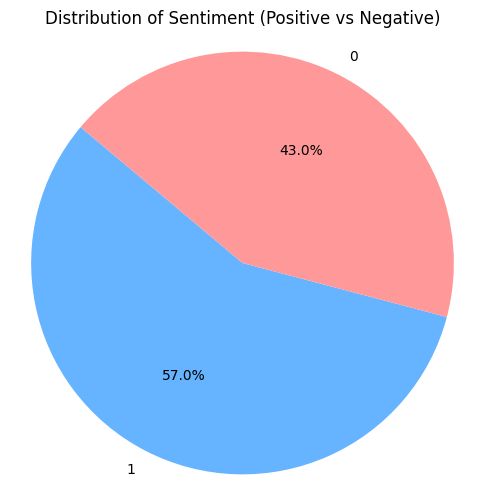

In [33]:
import pandas as pd
import matplotlib.pyplot as plt


# Count sentiment labels
sentiment_counts = dataset['Reviews'].value_counts()

# Create pie chart
plt.figure(figsize=(6,6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=['#66b3ff', '#ff9999'])
plt.title('Distribution of Sentiment (Positive vs Negative)')
plt.savefig('sentiment_distribution.png')
plt.axis('equal')
plt.show()


In [22]:
stopset = stopwords.words('english')

In [23]:
vectorizer = TfidfVectorizer(use_idf = True,lowercase = True, strip_accents='ascii',stop_words=stopset)

In [24]:
X = vectorizer.fit_transform(dataset.Comments)
y = dataset.Reviews
pickle.dump(vectorizer, open('tranform.pkl', 'wb'))

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [26]:
clf = naive_bayes.MultinomialNB()
clf.fit(X_train,y_train)

MultinomialNB()

In [27]:
accuracy_score(y_test,clf.predict(X_test))*100

97.47109826589595

In [28]:
clf = naive_bayes.MultinomialNB()
clf.fit(X,y)

MultinomialNB()

In [29]:
accuracy_score(y_test,clf.predict(X_test))*100

98.77167630057804

In [30]:
filename = 'nlp_model.pkl'
pickle.dump(clf, open(filename, 'wb'))